In [1]:
import pandas as pd
import numpy as np

In [2]:
text1='Ethics are built right into the ideals and objectives of the United Nations'

In [3]:
#No of characters
print(len(text1))

75


In [4]:
#No of words
print(len(text1.split(' ')))

13


In [5]:
text2=text1.split(' ')

In [6]:
text2

['Ethics',
 'are',
 'built',
 'right',
 'into',
 'the',
 'ideals',
 'and',
 'objectives',
 'of',
 'the',
 'United',
 'Nations']

In [7]:
#No of words with length>3
text3=[word for word in text2 if len(word)>3]

In [8]:
text3

['Ethics',
 'built',
 'right',
 'into',
 'ideals',
 'objectives',
 'United',
 'Nations']

In [9]:
#No of Tite words
text4=[word for word in text2 if word.istitle()]

In [10]:
text4

['Ethics', 'United', 'Nations']

In [11]:
#No of words ending with the character s
text5=[word for word in text2 if word.endswith('s')]

In [12]:
text5

['Ethics', 'ideals', 'objectives', 'Nations']

In [13]:
#Unique word count
text6='To be or not to be'
print(text6.split(' '))

['To', 'be', 'or', 'not', 'to', 'be']


In [14]:
 print(set(text6.split(' ')))

{'or', 'be', 'to', 'not', 'To'}


In [15]:
print(set(text6.lower().split(' ')))

{'or', 'be', 'to', 'not'}


In [16]:
text7=' ouagadougou'

In [17]:
text8=text7.split('ou')

In [18]:
text7=text7.strip()

In [19]:
text7

'ouagadougou'

In [20]:
text8

[' ', 'agad', 'g', '']

In [21]:
'ou'.join(text8)

' ouagadougou'

In [22]:
text7.find('o')

0

In [23]:
text7.rfind('o')

9

In [24]:
text9='. #UNSG @NY Society for Ethical culture bit.ly/2guVelr @UN @UN_Women'
text10=text1+text9

In [25]:
text10

'Ethics are built right into the ideals and objectives of the United Nations. #UNSG @NY Society for Ethical culture bit.ly/2guVelr @UN @UN_Women'

In [26]:
#Number of hashtags along with hashtags

In [27]:
import re
pattern_hash=re.compile('#\w*')

In [28]:
x=re.findall(pattern_hash,text10)

In [29]:
len(x)

1

In [30]:
x

['#UNSG']

In [31]:
#Number of @ along with the @

In [32]:
pattern_at=re.compile('@[A-Za-z0-9_]+')

In [33]:
y=re.findall(pattern_at,text10)

In [34]:
y

['@NY', '@UN', '@UN_Women']

In [35]:
len(y)

3

In [36]:
time_sentences = ["Monday: The doctor's appointment is at 2:45pm.", 
                  "Tuesday: The dentist's appointment is at 11:30 am.",
                  "Wednesday: At 7:00pm, there is a basketball game!",
                  "Thursday: Be back home by 11:15 pm at the latest.",
                  "Friday: Take the train at 08:10 am, arrive at 09:00am."]

In [37]:
df=pd.DataFrame(time_sentences,columns=['text'])

In [38]:
df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...
2,"Wednesday: At 7:00pm, there is a basketball game!"
3,Thursday: Be back home by 11:15 pm at the latest.
4,"Friday: Take the train at 08:10 am, arrive at ..."


In [39]:
#Number of characters for each string

In [40]:
df['text'].str.len()

0    46
1    50
2    49
3    49
4    54
Name: text, dtype: int64

In [41]:
#Number of tokens for each string

In [42]:
df['text'].str.split(' ').str.len()

0     7
1     8
2     8
3    10
4    10
Name: text, dtype: int64

In [43]:
#df containing entries which contains the word appointment

In [44]:
new_df=df[df['text'].str.contains('appointment')]

In [45]:
new_df

,text
0,Monday: The doctor's appointment is at 2:45pm.
1,Tuesday: The dentist's appointment is at 11:30...


In [46]:
#Occourance of a digit

In [47]:
df['text'].str.count(r'\d')

0    3
1    4
2    3
3    4
4    8
Name: text, dtype: int64

In [48]:
#Grouping of hours and minutes

In [49]:
df['text'].str.findall(r'(\d?\d):(\d\d)')

0               [(2, 45)]
1              [(11, 30)]
2               [(7, 00)]
3              [(11, 15)]
4    [(08, 10), (09, 00)]
Name: text, dtype: object

In [50]:
#replacing weekdays with 3 letter names

In [51]:
df['text'].replace({'Monday':'Mon','Tuesday':'Tue','Wednesday':'Wed','Thursday':'Thu','Friday':'Fri','Saturday':'Sat','Sunday':'Sun'},regex=True)

0          Mon: The doctor's appointment is at 2:45pm.
1       Tue: The dentist's appointment is at 11:30 am.
2          Wed: At 7:00pm, there is a basketball game!
3         Thu: Be back home by 11:15 pm at the latest.
4    Fri: Take the train at 08:10 am, arrive at 09:...
Name: text, dtype: object

In [52]:
pattern3='\w+:'
df['text'].str.replace(pattern3,'???')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13704\1847534634.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'].str.replace(pattern3,'???')


0          ??? The doctor's appointment is at ???45pm.
1        ??? The dentist's appointment is at ???30 am.
2          ??? At ???00pm, there is a basketball game!
3          ??? Be back home by ???15 pm at the latest.
4    ??? Take the train at ???10 am, arrive at ???0...
Name: text, dtype: object

In [53]:
df['text'].str.extractall(r'(?P<time>(?P<hour>\d?\d):(?P<minute>\d\d) ?(?P<period>[ap]m))')

time hour minute period
  match                             
0 0        2:45pm    2     45     pm
1 0      11:30 am   11     30     am
2 0        7:00pm    7     00     pm
3 0      11:15 pm   11     15     pm
4 0      08:10 am   08     10     am
  1       09:00am   09     00     am

In [54]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [55]:
import string

In [56]:
punc=string.punctuation

In [57]:
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
stop_words=stopwords.words('english')

In [59]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [60]:
def rem_url(text):
    pattern=re.compile('https?://\S+|www.\S+')
    return pattern.sub('',text)

In [61]:
from html.parser import HTMLParser

In [62]:
h=HTMLParser()

In [73]:
def rem_tags(text):
    pattern2=re.compile('<.*?>')
    return (pattern2.sub('',text))

In [76]:
def rem_punc(text):
    str=''
    for char in text:
        if char not in punc:
            str=str+char
    return str.strip()       

In [67]:
def token(text):
    return word_tokenize(text)
def sentences(text):
    return sent_tokenize(text)

In [68]:
def rem_sw(text):
    new_text=[]
    for word in text:
        if word not in stop_words:
            new_text.append(word)
    return new_text

In [69]:
def s_and_l(text):
    s=PorterStemmer()
    l=WordNetLemmatizer()
    stem_list=[]
    lem_list=[]
    for word in text:
        stem_list.append(s.stem(word))
    for word in stem_list:
        lem_list.append(l.lemmatize(word))
    return lem_list

In [87]:
def text_preprocessing(text):
    return s_and_l(rem_sw(token(rem_punc(rem_tags(rem_url(text))))))

In [64]:
rem_url('Hello My name is ,,,, <html.class> http://www.game.com Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer <htlm> ground')

'Hello My name is ,,,, <html.class>  Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer <htlm> ground'

In [74]:
rem_tags('Hello My name is ,,,, <html.class>  Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer <htlm> ground')

'Hello My name is ,,,,   Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer  ground'

In [77]:
rem_punc('Hello My name is ,,,,   Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer  ground')

'Hello My name is    Abhishek and i am loving it with all the love in the kicking of footballs in the soccer  ground'

In [78]:
token('Hello My name is    Abhishek and i am loving it with all the love in the kicking of footballs in the soccer  ground')

['Hello',
 'My',
 'name',
 'is',
 'Abhishek',
 'and',
 'i',
 'am',
 'loving',
 'it',
 'with',
 'all',
 'the',
 'love',
 'in',
 'the',
 'kicking',
 'of',
 'footballs',
 'in',
 'the',
 'soccer',
 'ground']

In [79]:
rem_sw(['Hello',
 'My',
 'name',
 'is',
 'Abhishek',
 'and',
 'i',
 'am',
 'loving',
 'it',
 'with',
 'all',
 'the',
 'love',
 'in',
 'the',
 'kicking',
 'of',
 'footballs',
 'in',
 'the',
 'soccer',
 'ground'])

['Hello',
 'My',
 'name',
 'Abhishek',
 'loving',
 'love',
 'kicking',
 'footballs',
 'soccer',
 'ground']

In [80]:
s_and_l(['Hello',
 'My',
 'name',
 'Abhishek',
 'loving',
 'love',
 'kicking',
 'footballs',
 'soccer',
 'ground'])

['hello',
 'my',
 'name',
 'abhishek',
 'love',
 'love',
 'kick',
 'footbal',
 'soccer',
 'ground']

In [84]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [85]:
pos_tag(['hello',
 'my',
 'name',
 'abhishek',
 'love',
 'love',
 'kick',
 'footbal',
 'soccer',
 'ground'])

[('hello', 'NN'),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('abhishek', 'RB'),
 ('love', 'VB'),
 ('love', 'NN'),
 ('kick', 'NN'),
 ('footbal', 'JJ'),
 ('soccer', 'NN'),
 ('ground', 'NN')]

In [88]:
text_preprocessing('Hello My name is ,,,, <html.class> http://www.game.com Abhishek and i am loving it with all the love in the kicking of footballs, in the soccer <htlm> ground')

['hello',
 'my',
 'name',
 'abhishek',
 'love',
 'love',
 'kick',
 'footbal',
 'soccer',
 'ground']

In [89]:
sample='<html><head><title>Sample Page</title></head><body>This is a sample text for testing preprocessing. It contains various elements such as punctuation, numbers like 123, and stopwords like the, is, and for. The text also includes different verb forms, including jumped, jumping, and jumps. Additionally, it has different cases like uppercase and lowercase. Finally, it mentions days of the week like Monday, Tuesday, and Wednesday. You can visit our website at http://www.example.com for more information.</body></html>'

In [90]:
text_preprocessing(sample)

['sampl',
 'pagethi',
 'sampl',
 'text',
 'test',
 'preprocess',
 'it',
 'contain',
 'variou',
 'element',
 'punctuat',
 'number',
 'like',
 '123',
 'stopword',
 'like',
 'the',
 'text',
 'also',
 'includ',
 'differ',
 'verb',
 'form',
 'includ',
 'jump',
 'jump',
 'jump',
 'addit',
 'differ',
 'case',
 'like',
 'uppercas',
 'lowercas',
 'final',
 'mention',
 'day',
 'week',
 'like',
 'monday',
 'tuesday',
 'wednesday',
 'you',
 'visit',
 'websit',
 'inform']

In [91]:
import matplotlib.pyplot as plt

In [93]:
from wordcloud import WordCloud

In [94]:
plt.figure(figsize=(20,10))
wc=WordCloud(height=500,width=500,background_color='white')

<Figure size 2000x1000 with 0 Axes>

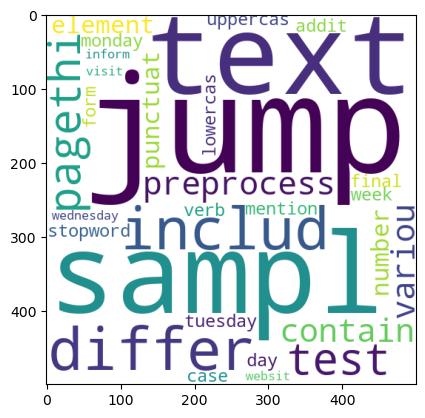

In [98]:
plt.imshow(wc.generate(' '.join(text_preprocessing(sample))))